# Project for UDA Assessment 4
## Author: 02179784 (Mark Roberts)

<B>Project Description:</B><BR>
The objective of this project is to create an image classification model and determine how its accuracy degrades as noise is added to the images it must classify.

The dataset consists of black & white images of dogs and cats - 5000 of each.  The dataset was obtained from
Kaggle: [Cat and Dog Images](https://www.kaggle.com/datasets/chetankv/dogs-cats-images).<BR>
The original dataset was of coloured images but the dataset was too large so the images where converted to black & white and resized to be 150 x 150 pixels, with each pixel taking a value between 0 and 255.<BR>
The Kaggle images have already been split into training and test images - 8000 training images of cats and dogs and 2000 test images of cats and dogs!

The model used was not a sophisticated one, but one that gave a reasonable degree of accuracy after training (i.e. greater than 90%).  The model could be swapped out for a more sophisticated one without altering the structure of the notebook.  In this way various models could be tested to see how they perform under \"noisy\" conditions.

The analysis has been split into the following steps:
 - Train the classification model using the clean black & white images.
 - Determine accuracy of the model
 - Add various levels of noise to the test images & determine accuracy of the model.
 - Conclusion / Summary


<B>General Information:</B><BR>
 - This script was run on a Macbook Pro. with 32 GB of RAM.
 - The total run time of the Jupyter notebook was (approx) 120 seconds.
 - The Github repository for all code and datasets can be obtained by cloning the repository:
[GitHub-Repo](git@github.com:Mark12481632/UDA_Assessment_4_02179784_Roberts.git)
 - The model used to classify the images is based on __Keras__ and much of the code for this model was obtained from: [Keras Code Examples](https://keras.io/examples/vision/image_classification_from_scratch/)"

In [1]:
# Import the libraries we will use:\n",

import numpy as np
import os
import matplotlib.pyplot as plt

from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

2022-12-20 15:43:55.362190: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Common variables:

# Directories containing the training & test images
training_dir = "./pets/training_set"
test_dir = "./pets/test_set"

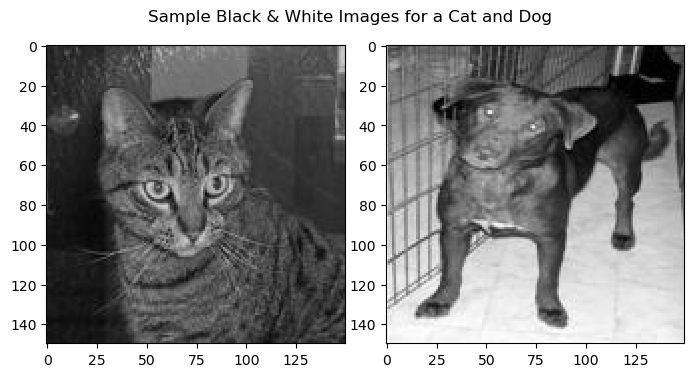

In [16]:
# Show examples of the clean cat and dog images we will be working with:

fig = plt.figure(figsize=(7, 7))
fig.suptitle('Sample Black & White Images for a Cat and Dog')
ax_1 = fig.add_subplot(2,2,1)
io.imshow(io.imread(training_dir + "/bw_cat.1.jpg"))
ax_2 = fig.add_subplot(2,2,2)
io.imshow(io.imread(training_dir + "/bw_dog.1.jpg"))

In [17]:
# Build model structure

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [18]:
# Configure model:

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [19]:
# Generator for training data and used to train model:

train_generator = ImageDataGenerator(rescale=1./255)
train_data_generator = train_generator.flow_from_directory(training_dir,
                                                           target_size=(150, 150),
                                                           batch_size=20,
                                                           class_mode='binary')

test_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = test_generator.flow_from_directory(test_dir,
                                                         target_size=(150, 150),
                                                         batch_size=20,
                                                         class_mode='binary')

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
